<a href="https://colab.research.google.com/github/thaitruong018/Credit_Risk_Modeling/blob/main/Building_PD_model_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the Data and Selecting the Features**

### Import Libraries

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Imports the libraries we need.
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
import scipy.stats as stat
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
sns.set()

### Import Data

In [ ]:
# load data
loan_data_inputs_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Credit Risk Modeling/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Credit Risk Modeling/loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Credit Risk Modeling/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Credit Risk Modeling/loan_data_targets_test.csv', index_col = 0)

In [ ]:
# first 5 rows
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,A5,...,1,0,0,1,0,0,0,0,0,0
206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,C1,...,0,0,0,1,0,0,0,0,0,0
136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,A5,...,0,0,0,1,0,0,0,0,0,0
412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0
36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,C2,...,0,1,0,1,0,0,0,0,0,0


### View Shape of Data

In [ ]:
# first 5 rows
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [ ]:
# first 5 rows
loan_data_targets_test.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


In [ ]:
# shape of data
loan_data_inputs_train.shape

(373028, 323)

In [ ]:
# shape of data
loan_data_targets_train.shape

(373028, 1)

In [ ]:
# shape of data
loan_data_inputs_test.shape

(93257, 323)

In [ ]:
# shape of data
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [ ]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [ ]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories
# to avoid dummy variable trap
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


### **PD Model Estimation**

#### **Logistic Regression**

In [ ]:
# We create an instance of an object from the 'LogisticRegression' class.
reg = LogisticRegression()

In [ ]:
# Sets the pandas dataframe options to display all columns/ rows.
pd.options.display.max_rows = None

In [ ]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.
reg.intercept_

array([-1.33114276])

In [ ]:
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.
reg.coef_

array([[ 1.16012512,  0.9060687 ,  0.70887382,  0.51906602,  0.33683564,
         0.14490614,  0.09080623,  0.1067846 ,  0.02966999,  0.05523331,
         0.05659328,  0.05939445,  0.07495861,  0.13243139,  0.09934002,
         0.18111284,  0.22490873,  0.22033345,  0.25913949,  0.31661027,
         0.51751537,  0.08806333, -0.01075994,  0.30677695,  0.20251626,
         0.21414799,  0.26666358,  0.05442797,  0.0780676 ,  0.10016993,
         0.12529032,  0.08958827,  0.06084299,  0.12334298,  1.07506084,
         0.87435814,  0.77403093,  0.572945  ,  0.41064749,  0.16587335,
        -0.0698225 ,  0.85053376,  0.53833864,  0.28958748,  0.10064268,
         0.05610314,  0.03781487,  0.07953656,  0.11952787,  0.12623413,
         0.07426133,  0.03129739,  0.63483228,  0.49143346,  0.2820586 ,
        -0.01104042, -0.10865474, -0.1343295 , -0.14973252, -0.15433472,
        -0.11934734, -0.20972133,  0.1226412 ,  0.17844547, -0.020936  ,
         0.0253509 ,  0.21759552,  0.03468936,  0.0

In [ ]:
# Stores the names of the columns of a dataframe in a variable.
feature_name = inputs_train.columns.values
feature_name

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NM_VA', 'addr_state:NY',
       'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:credit_card',
       'purpose:debt_consolidation', 'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'initial_list_status:w',
       'term:36', 'emp_length:1', 'emp_length:2-4', 'emp_length:5-6',
       'emp_length:7-9', 'emp_length:10', 'mths_since_issue_d:<38',
       'mths_since_issue_d:38-39', 'mths_since_issue_d:40-41',
       'mths_since_issue_d:42-48', 'mths_since_issue_d:49-52',
 

In [ ]:
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a new column in the dataframe, called 'Coefficients',
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Increases the index of every row of the dataframe with 1.
summary_table.index = summary_table.index + 1
# Assigns values of the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Sorts the dataframe by index.
summary_table = summary_table.sort_index()

summary_table

,Feature name,Coefficients
0,Intercept,-1.331143
1,grade:A,1.160125
2,grade:B,0.906069
3,grade:C,0.708874
4,grade:D,0.519066
5,grade:E,0.336836
6,grade:F,0.144906
7,home_ownership:OWN,0.090806
8,home_ownership:MORTGAGE,0.106785
9,addr_state:NM_VA,0.029670


#### **Build a Logistic Regression Model with P-Values**

In [ ]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)

        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.
reg = LogisticRegression_with_p_values()

In [ ]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.331143
1,grade:A,1.160125
2,grade:B,0.906069
3,grade:C,0.708874
4,grade:D,0.519066
5,grade:E,0.336836
6,grade:F,0.144906
7,home_ownership:OWN,0.090806
8,home_ownership:MORTGAGE,0.106785
9,addr_state:NM_VA,0.029670


In [ ]:
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
# This is a list.
p_values = reg.p_values

In [ ]:
# We add the value 'NaN' in the beginning of the variable with p-values.
p_values = np.append(np.nan, np.array(p_values))

In [ ]:
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.331143,NaN
1,grade:A,1.160125,1.697291e-37
2,grade:B,0.906069,1.035725e-49
3,grade:C,0.708874,6.530741e-36
4,grade:D,0.519066,4.991919e-22
5,grade:E,0.336836,2.511045e-12
6,grade:F,0.144906,3.856502e-03
7,home_ownership:OWN,0.090806,6.793957e-06
8,home_ownership:MORTGAGE,0.106785,4.238521e-17
9,addr_state:NM_VA,0.029670,3.545565e-01


In [ ]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [ ]:
# columns need to be removed to avoid dummy variable trap
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
# drop ref_categories to create final train dataset
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# get columns name
feature_name = inputs_train.columns.values
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.374020
1,grade:A,1.123668
2,grade:B,0.878915
3,grade:C,0.684793
4,grade:D,0.496922
5,grade:E,0.321491
6,grade:F,0.134284
7,home_ownership:OWN,0.093517
8,home_ownership:MORTGAGE,0.106247
9,addr_state:NM_VA,0.036018


In [ ]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
# Here we get the results for our final PD model.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.374020,NaN
1,grade:A,1.123668,3.223977e-35
2,grade:B,0.878915,4.282027e-47
3,grade:C,0.684793,6.716793e-34
4,grade:D,0.496922,1.347133e-20
5,grade:E,0.321491,1.025645e-11
6,grade:F,0.134284,6.241877e-03
7,home_ownership:OWN,0.093517,3.460083e-06
8,home_ownership:MORTGAGE,0.106247,4.424906e-17
9,addr_state:NM_VA,0.036018,2.608649e-01


In [ ]:
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.
# pickle.dump(reg2, open('/content/gdrive/MyDrive/Colab Notebooks/Credit Risk Modeling/pd_model.sav', 'wb'))

### **PD Model Validation (Test)**

**Out-of-sample validation (test)**

In [ ]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat  = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [ ]:
# columns need to be removed to avoid dummy variable trap
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
# # drop ref_categories to create final train dataset
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
# Estimated probability <= 50%: Bad, 0. >50%: Good, 1
y_hat_test = reg2.model.predict(inputs_test)
# This is an array of predicted discrete classess (in this case, 0s and 1s).
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [ ]:
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the second class, i.e. 1.
y_hat_test_proba

array([[0.07569443, 0.92430557],
       [0.15076114, 0.84923886],
       [0.11465131, 0.88534869],
       ...,
       [0.02678665, 0.97321335],
       [0.04020869, 0.95979131],
       [0.04763352, 0.95236648]])

In [ ]:
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1
y_hat_test_proba = y_hat_test_proba[:,1]
# This variable contains an array of probabilities of being 1.
y_hat_test_proba

array([0.92430557, 0.84923886, 0.88534869, ..., 0.97321335, 0.95979131,
       0.95236648])

In [ ]:
# create new variable
loan_data_targets_test_temp = loan_data_targets_test

In [ ]:
# We reset the index of a dataframe.
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
loan_data_targets_test_temp.head()

,good_bad
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Concatenates two dataframes.
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.924306
1,1,0.849239
2,1,0.885349
3,1,0.940636
4,1,0.968665


In [ ]:
# Makes the index of one dataframe equal to the index of another dataframe.
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924306
288564,1,0.849239
213591,1,0.885349
263083,1,0.940636
165001,1,0.968665


### **Evaluation the model**

#### **Accuracy and Area under the Curve**

In [ ]:
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [ ]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], colnames = ['Predicted'])


Predicted,0,1
Actual,,
0,7374,2816
1,35813,47254


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])

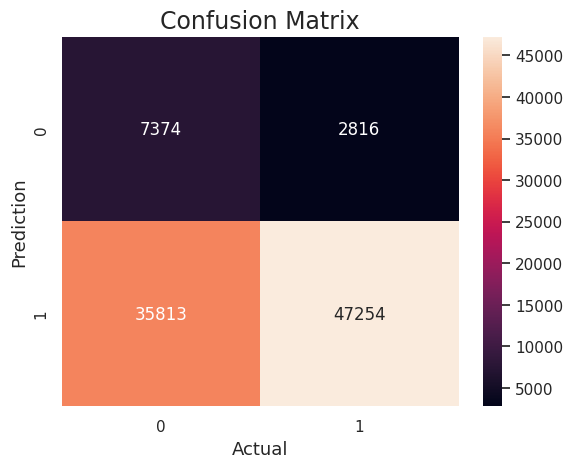

In [ ]:
# Plot the confusion matrix with the help of the seaborn heatmap
sns.heatmap(cm,
			annot=True,
			fmt='g',
			#xticklabels=['Good', 'Bad'],
			#yticklabels=['Good', 'Bad']
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Bad:0 , Good: 1

In [ ]:
# we calculate Accuracy of the model
accuracy = accuracy_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])
print("Accuracy :", accuracy)

Accuracy : 0.5857790836076648


In [ ]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262865, 0.99262865, 0.9906977 , ..., 0.4879076 , 0.3937392 ,
        0.37528668]))

In [ ]:
# Here we store each of the three arrays in a separate variable.
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

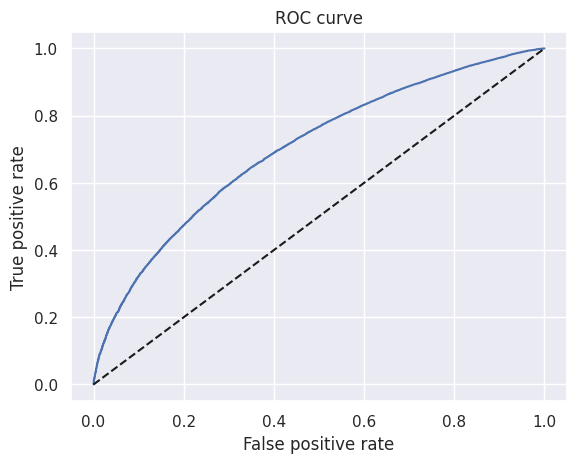

In [ ]:
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, tpr)
# We plot a seconary diagonal line, with dashed line style and black color.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We name the x-axis "False positive rate".
plt.xlabel('False positive rate')
# We name the x-axis "True positive rate".
plt.ylabel('True positive rate')
# We name the graph "ROC curve".
plt.title('ROC curve')

In [ ]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
print("AUROC :", AUROC)

AUROC : 0.7022081617008902


#### **Gini and Kolmogorov-Smirnov**

In [ ]:
# Sorts a dataframe by the values of a specific column.
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# first 5 rows
print("first 5 rows: " , df_actual_predicted_probs.head())
# last 5 rows
print("last 5 rows: ", df_actual_predicted_probs.tail())

first 5 rows:         loan_data_targets_test  y_hat_test_proba  y_hat_test
42341                       1          0.375287           0
42344                       1          0.392102           0
39810                       0          0.393739           0
40518                       0          0.448969           0
42396                       0          0.457735           0
last 5 rows:          loan_data_targets_test  y_hat_test_proba  y_hat_test
262480                       1          0.991292           1
231463                       1          0.991304           1
239228                       1          0.991652           1
261086                       1          0.992058           1
242624                       1          0.992629           1


In [ ]:
# We reset the index of a dataframe and overwrite it.
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.375287,0
1,42344,1,0.392102,0
2,39810,0,0.393739,0
3,40518,0,0.448969,0
4,42396,0,0.457735,0


In [ ]:
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in python starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# print the result
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.375287,0,1,1,0
1,42344,1,0.392102,0,2,2,0
2,39810,0,0.393739,0,3,2,1
3,40518,0,0.448969,0,4,2,2
4,42396,0,0.457735,0,5,2,3


In [ ]:
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate the cumulative percentage of 'bad'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# print the result
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.375287,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.392102,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.393739,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.448969,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.457735,0,5,2,3,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'Gini')

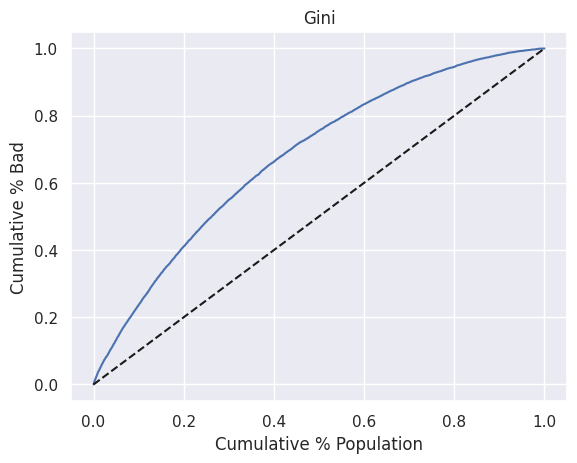

In [ ]:
# Plot Gini
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'Bad' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot a seconary diagonal line, with dashed line style and black color.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We name the x-axis "Cumulative % Population".
plt.xlabel('Cumulative % Population')
# We name the y-axis "Cumulative % Bad".
plt.ylabel('Cumulative % Bad')
# We name the graph "Gini".
plt.title('Gini')


In [ ]:
# Here we calculate Gini from AUROC.
Gini = AUROC * 2 - 1
print("Gini: ", Gini)

Gini:  0.40441632340178035


Text(0.5, 1.0, 'Kolmogorov-Smirnov')

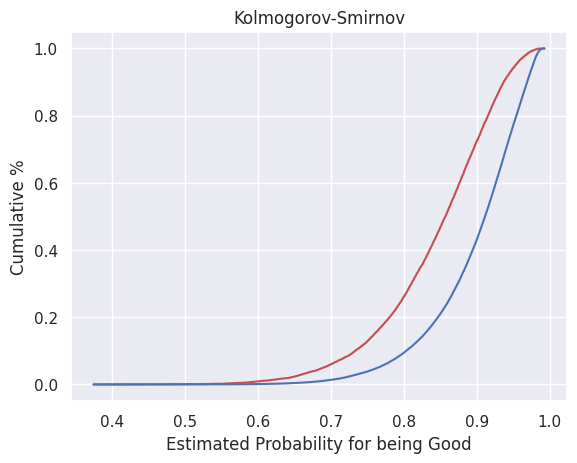

In [ ]:
# Plot KS
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We name the x-axis "Estimated Probability for being Good".
plt.xlabel('Estimated Probability for being Good')
# We name the y-axis "Cumulative %".
plt.ylabel('Cumulative %')
# We name the graph "Kolmogorov-Smirnov".
plt.title('Kolmogorov-Smirnov')

In [ ]:
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
print("KS: ", KS)

KS:  0.2966746932223847


### **Applying the PD Model**

#### Creating a Scorecard

In [ ]:
# re-view feature names and intercept
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.374020,NaN
1,grade:A,1.123668,3.223977e-35
2,grade:B,0.878915,4.282027e-47
3,grade:C,0.684793,6.716793e-34
4,grade:D,0.496922,1.347133e-20
5,grade:E,0.321491,1.025645e-11
6,grade:F,0.134284,6.241877e-03
7,home_ownership:OWN,0.093517,3.460083e-06
8,home_ownership:MORTGAGE,0.106247,4.424906e-17
9,addr_state:NM_VA,0.036018,2.608649e-01


In [ ]:
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['Coefficients'] = 0
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories['p_values'] = np.nan

df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [ ]:
# Concatenates two dataframes.
df_scorecard = pd.concat([summary_table, df_ref_categories])
# We reset the index of a dataframe.
df_scorecard = df_scorecard.reset_index()

df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.374020,NaN
1,1,grade:A,1.123668,3.223977e-35
2,2,grade:B,0.878915,4.282027e-47
3,3,grade:C,0.684793,6.716793e-34
4,4,grade:D,0.496922,1.347133e-20
5,5,grade:E,0.321491,1.025645e-11
6,6,grade:F,0.134284,6.241877e-03
7,7,home_ownership:OWN,0.093517,3.460083e-06
8,8,home_ownership:MORTGAGE,0.106247,4.424906e-17
9,9,addr_state:NM_VA,0.036018,2.608649e-01


In [ ]:
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.374020,NaN,Intercept
1,1,grade:A,1.123668,3.223977e-35,grade
2,2,grade:B,0.878915,4.282027e-47,grade
3,3,grade:C,0.684793,6.716793e-34,grade
4,4,grade:D,0.496922,1.347133e-20,grade
5,5,grade:E,0.321491,1.025645e-11,grade
6,6,grade:F,0.134284,6.241877e-03,grade
7,7,home_ownership:OWN,0.093517,3.460083e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.106247,4.424906e-17,home_ownership
9,9,addr_state:NM_VA,0.036018,2.608649e-01,addr_state


In [ ]:
# create 2 typical Fico score
min_score = 300
max_score = 850

In [ ]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.5385068914930924

In [ ]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.59025874067271

In [ ]:
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.374020,NaN,Intercept,-106.008659
1,1,grade:A,1.123668,3.223977e-35,grade,86.693447
2,2,grade:B,0.878915,4.282027e-47,grade,67.810224
3,3,grade:C,0.684793,6.716793e-34,grade,52.833320
4,4,grade:D,0.496922,1.347133e-20,grade,38.338656
5,5,grade:E,0.321491,1.025645e-11,grade,24.803720
6,6,grade:F,0.134284,6.241877e-03,grade,10.360290
7,7,home_ownership:OWN,0.093517,3.460083e-06,home_ownership,7.215041
8,8,home_ownership:MORTGAGE,0.106247,4.424906e-17,home_ownership,8.197228
9,9,addr_state:NM_VA,0.036018,2.608649e-01,addr_state,2.778841


In [ ]:
# calculate intercept score
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

<ipython-input-71-5944125536d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.374020,NaN,Intercept,312.690543
1,1,grade:A,1.123668,3.223977e-35,grade,86.693447
2,2,grade:B,0.878915,4.282027e-47,grade,67.810224
3,3,grade:C,0.684793,6.716793e-34,grade,52.833320
4,4,grade:D,0.496922,1.347133e-20,grade,38.338656
5,5,grade:E,0.321491,1.025645e-11,grade,24.803720
6,6,grade:F,0.134284,6.241877e-03,grade,10.360290
7,7,home_ownership:OWN,0.093517,3.460083e-06,home_ownership,7.215041
8,8,home_ownership:MORTGAGE,0.106247,4.424906e-17,home_ownership,8.197228
9,9,addr_state:NM_VA,0.036018,2.608649e-01,addr_state,2.778841


In [ ]:
# We round the values of the 'Score - Calculation' column.
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.374020,NaN,Intercept,312.690543,313.0
1,1,grade:A,1.123668,3.223977e-35,grade,86.693447,87.0
2,2,grade:B,0.878915,4.282027e-47,grade,67.810224,68.0
3,3,grade:C,0.684793,6.716793e-34,grade,52.833320,53.0
4,4,grade:D,0.496922,1.347133e-20,grade,38.338656,38.0
5,5,grade:E,0.321491,1.025645e-11,grade,24.803720,25.0
6,6,grade:F,0.134284,6.241877e-03,grade,10.360290,10.0
7,7,home_ownership:OWN,0.093517,3.460083e-06,home_ownership,7.215041,7.0
8,8,home_ownership:MORTGAGE,0.106247,4.424906e-17,home_ownership,8.197228,8.0
9,9,addr_state:NM_VA,0.036018,2.608649e-01,addr_state,2.778841,3.0


In [ ]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()

min_sum_score_prel

300.0

In [ ]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()

max_sum_score_prel

851.0

In [ ]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.
# df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
# df_scorecard.sort_values(by= 'Difference', ascending= False)

In [ ]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
#df_scorecard['Score - Final'][77] = 16
#df_scorecard

#### Caclulating Credit Score

In [ ]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [ ]:
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
scorecard_scores = df_scorecard['Score - Final']

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [ ]:
scorecard_scores.shape

(102,)

In [ ]:
# reshape scorecard_score dataframe
scorecard_scores = scorecard_scores.values.reshape(102, 1)
scorecard_scores.shape

(102, 1)

In [ ]:
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)


In [ ]:
y_scores.head()

,0
362514,614.0
288564,553.0
213591,577.0
263083,633.0
165001,683.0


In [ ]:
y_scores.tail()

,0
115,573.0
296284,679.0
61777,696.0
91763,664.0
167512,651.0


#### From Credit Score to PD

In [ ]:
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef


In [ ]:
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

y_hat_proba_from_score.head()

,0
362514,0.926312
288564,0.850779
213591,0.886129
263083,0.941455
165001,0.968498


In [ ]:
y_hat_test_proba[0: 5]

array([0.92430557, 0.84923886, 0.88534869, 0.94063571, 0.96866472])

### **Setting Cut-offs**

In [ ]:
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [ ]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], colnames = ['Predicted'])


Predicted,0,1
Actual,,
0,7374,2816
1,35813,47254


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])

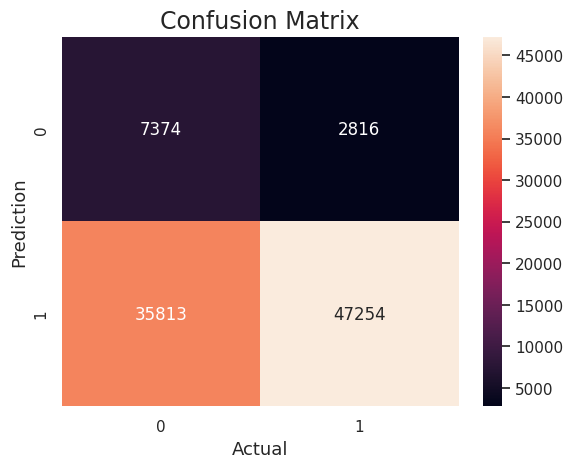

In [ ]:
# Plot the confusion matrix with the help of the seaborn heatmap
sns.heatmap(cm,
			annot=True,
			fmt='g',
			#xticklabels=['Good', 'Bad'],
			#yticklabels=['Good', 'Bad']
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Bad:0 , Good: 1

In [ ]:
# we calculate Accuracy of the model
accuracy = accuracy_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'])
print("Accuracy :", accuracy)

Accuracy : 0.5857790836076648


In [ ]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262865, 0.99262865, 0.9906977 , ..., 0.4879076 , 0.3937392 ,
        0.37528668]))

In [ ]:
# Here we store each of the three arrays in a separate variable.
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

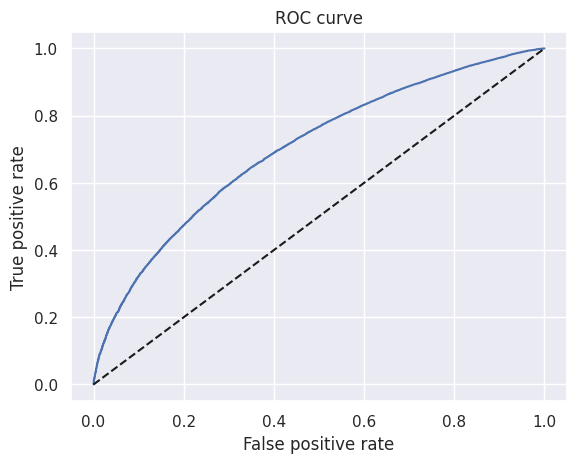

In [ ]:
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, tpr)
# We plot a seconary diagonal line, with dashed line style and black color.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We name the x-axis "False positive rate".
plt.xlabel('False positive rate')
# We name the x-axis "True positive rate".
plt.ylabel('True positive rate')
# We name the graph "ROC curve".
plt.title('ROC curve')

In [ ]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
print("AUROC :", AUROC)

AUROC : 0.7022081617008902


In [ ]:
thresholds

array([1.99262865, 0.99262865, 0.9906977 , ..., 0.4879076 , 0.3937392 ,
       0.37528668])

In [ ]:
thresholds.shape

(17276,)

In [ ]:
# We concatenate 3 dataframes along the columns.
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992629,0.000000,0.000000
1,0.992629,0.000000,0.000012
2,0.990698,0.000000,0.000120
3,0.990653,0.000098,0.000120
4,0.989823,0.000098,0.000421


In [ ]:
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.
 = 1- 1/np.power(10,16)

In [ ]:
df_cutoffs['thresholds'][0]

0.9999999999999999

In [ ]:
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3253.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989823,0.000098,0.000421,772.0


In [ ]:
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989823,0.000098,0.000421,772.0


In [ ]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17271,0.493411,0.999411,0.999964,417.0
17272,0.488602,0.999607,0.999964,415.0
17273,0.487908,0.999607,0.999976,415.0
17274,0.393739,1.000000,0.999976,385.0
17275,0.375287,1.000000,1.000000,379.0


In [ ]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold.
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Rejection rate equals one minus approval rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992629,0.000000,0.000012,797.0,1,93256,0.000011,0.999989
2,0.990698,0.000000,0.000120,779.0,10,93247,0.000107,0.999893
3,0.990653,0.000098,0.000120,778.0,11,93246,0.000118,0.999882
4,0.989823,0.000098,0.000421,772.0,36,93221,0.000386,0.999614


In [ ]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17271,0.493411,0.999411,0.999964,417.0,93248,9,0.999903,0.000097
17272,0.488602,0.999607,0.999964,415.0,93250,7,0.999925,0.000075
17273,0.487908,0.999607,0.999976,415.0,93251,6,0.999936,0.000064
17274,0.393739,1.000000,0.999976,385.0,93255,2,0.999979,0.000021
17275,0.375287,1.000000,1.000000,379.0,93257,0,1.000000,0.000000


In [ ]:
# let's assume the highest level of probability we'd accept is 10%
# in other words, the lowest possible probability of being good is 90%
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.
df_cutoffs.iloc[5000: 6200, ]


,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903596,0.259274,0.547630,591.0,48132,45125,0.516122,0.483878
5001,0.903592,0.259274,0.547666,591.0,48135,45122,0.516154,0.483846
5002,0.903590,0.259372,0.547666,591.0,48136,45121,0.516165,0.483835
5003,0.903590,0.259372,0.547678,591.0,48137,45120,0.516176,0.483824
5004,0.903583,0.259470,0.547678,591.0,48138,45119,0.516186,0.483814
5005,0.903546,0.259470,0.547919,591.0,48158,45099,0.516401,0.483599
5006,0.903546,0.259568,0.547919,591.0,48159,45098,0.516412,0.483588
5007,0.903509,0.259568,0.548148,591.0,48178,45079,0.516615,0.483385
5008,0.903508,0.259666,0.548148,591.0,48179,45078,0.516626,0.483374
5009,0.903481,0.259666,0.548316,591.0,48193,45064,0.516776,0.483224


In [ ]:
# let's assume the probability of default is 5%
# in other words, the lowest possible probability of being good is 95%
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.
df_cutoffs.iloc[1000: 2000, ]


,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953241,0.049166,0.206592,651.0,17662,75595,0.189391,0.810609
1001,0.953230,0.049166,0.206737,651.0,17674,75583,0.189519,0.810481
1002,0.953226,0.049264,0.206737,651.0,17675,75582,0.189530,0.810470
1003,0.953220,0.049264,0.206797,651.0,17680,75577,0.189584,0.810416
1004,0.953219,0.049362,0.206797,651.0,17681,75576,0.189594,0.810406
1005,0.953192,0.049362,0.207026,651.0,17700,75557,0.189798,0.810202
1006,0.953190,0.049460,0.207026,651.0,17701,75556,0.189809,0.810191
1007,0.953187,0.049460,0.207050,651.0,17703,75554,0.189830,0.810170
1008,0.953184,0.049558,0.207050,651.0,17704,75553,0.189841,0.810159
1009,0.953143,0.049558,0.207278,651.0,17723,75534,0.190045,0.809955


In [ ]:
inputs_train_with_ref_cat.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Credit Risk Modeling/inputs_train_with_ref_cat.csv')
df_scorecard.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Credit Risk Modeling/df_scorecard.csv')